In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split

In [3]:
train_df = pd.read_csv('train_iris.csv')
test_df = pd.read_csv('test_iris.csv')

In [4]:
train_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [5]:
test_df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [6]:
y = train_df['species']
X = train_df.drop(['species'], axis=1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [20]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score],
                                    'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [21]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.693333,0.52
0,2,1.000000,1.00
0,3,1.000000,1.00
0,4,1.000000,1.00
0,5,1.000000,1.00


In [22]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], 
                                    value_vars=['train_score', 'test_score'], 
                                   var_name='set_type', value_name='score')

In [23]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.693333
1,2,train_score,1.000000
2,3,train_score,1.000000
3,4,train_score,1.000000
4,5,train_score,1.000000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

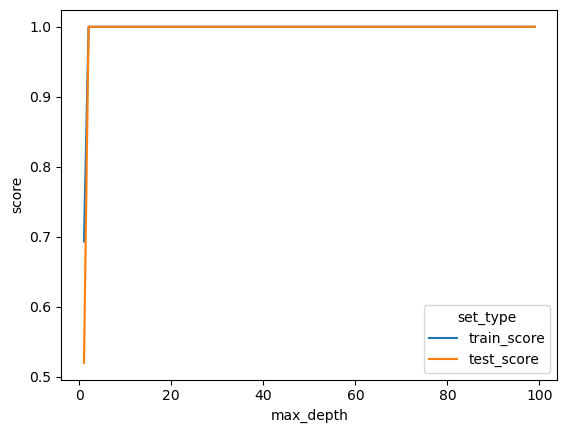

In [24]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)